<a href="https://colab.research.google.com/github/ag20327/CE888/blob/main/Lab7/Task1CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [3]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [33]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 43s 56ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0421 - val_accuracy: 0.9892
Epoch 2/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0468 - val_accuracy: 0.9893
Epoch 3/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0493 - val_accuracy: 0.9903
Epoch 4/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0475 - val_accuracy: 0.9902
Epoch 5/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0529 - val_accuracy: 0.9900


#### evaluate model

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0375 - accuracy: 0.9923


0.9922999739646912

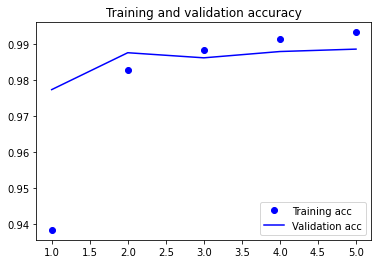

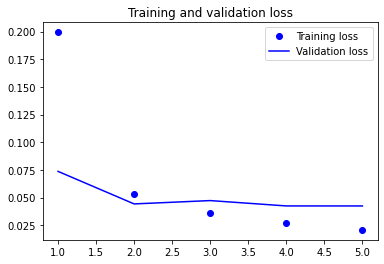

In [12]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

Effect of changing the activation function

Effect on changing the optimizer

Exploring with different optimizer and activation function showed that 
Adam with Relu yielded the best result

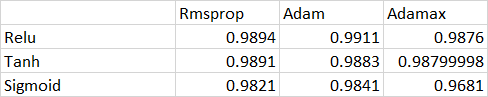

**ConvNet**

#### Load Data

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
activ='relu'
opti='adam'

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=activ, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=activ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=activ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=activ))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=opti, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
print(" ")
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

Epoch 1/5
750/750 [==============================] - 42s 56ms/step - loss: 0.4791 - accuracy: 0.8526 - val_loss: 0.0733 - val_accuracy: 0.9781
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.0452 - val_accuracy: 0.9867
Epoch 3/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0383 - accuracy: 0.9888 - val_loss: 0.0459 - val_accuracy: 0.9861
Epoch 4/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 5/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0241 - accuracy: 0.9918 - val_loss: 0.0352 - val_accuracy: 0.9889
 
313/313 [==============================] - 3s 10ms/step - loss: 0.0306 - accuracy: 0.9906


0.9905999898910522

**Grid Search**

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid


Best Epoch and Batch size

In [43]:
def create_model():
  model = models.Sequential(optimizer='adam',activation='relu')
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [59]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# define the grid search parameters
batch_size = [10]#, 20, 40, 60, 80, 100]
epochs = [10]#, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,activation=activation)
list(ParameterGrid(param_grid))

In [67]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels)

In [68]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.979467 using {'batch_size': 10, 'epochs': 10}
